In [155]:
import pickle
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


In [156]:
def unpickle(file):
    
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    images = dict[b'data'] #this means value assoicate with the key is byte string
    images = images.reshape((len(images), 32, 32, 3))
    labels = np.array(dict[b'labels'])
    return images, labels

In [157]:
def load_data():
    '''
    Returns dataset in numpy format with dictionary 
    keys train_images,train_labels, test_images, test_labels
    '''
    #Load train data # cifar-10-batches-py/data_batch_{1|2|3|4|5}
    train_images  =  []
    train_labels =  []
    test_images  =  []
    test_labels =  []
    data_path  = "dataset/cifar-10-batches-py"
    test_file = data_path + os.path.sep + "test_batch"
    for i in range(1,6):
        file  = os.path.join(data_path, f"data_batch_{i}")
        images, labels = unpickle(file)
        print(f"File :  {data_path} Batch {i} Image: {images.shape} labels: {labels.shape} ")
        train_images.append(images)
        train_labels.append(labels)
    #Convert multiple numpy array present in a list to numpy array 
    train_images = np.concatenate(train_images, axis=0) #Add across rows 
    train_labels = np.concatenate(train_labels, axis=0) 
    print(f"Shape of final train Dataset {train_images.shape} Label: {train_labels.shape} ")

    test_images, test_labels = unpickle(test_file)
    print(f"Shape of test Dataset {test_images.shape} Label: {test_labels.shape} ")

    return {"train_images":train_images, "train_labels": train_labels, 
            "test_images": test_images, "test_labels":  test_labels}




In [158]:
data  = load_data()
print(data['train_images'].shape , data['train_labels'].shape )
print(data['test_images'].shape, data['test_labels'].shape)



File :  dataset/cifar-10-batches-py Batch 1 Image: (10000, 32, 32, 3) labels: (10000,) 
File :  dataset/cifar-10-batches-py Batch 2 Image: (10000, 32, 32, 3) labels: (10000,) 
File :  dataset/cifar-10-batches-py Batch 3 Image: (10000, 32, 32, 3) labels: (10000,) 
File :  dataset/cifar-10-batches-py Batch 4 Image: (10000, 32, 32, 3) labels: (10000,) 
File :  dataset/cifar-10-batches-py Batch 5 Image: (10000, 32, 32, 3) labels: (10000,) 
Shape of final train Dataset (50000, 32, 32, 3) Label: (50000,) 
Shape of test Dataset (10000, 32, 32, 3) Label: (10000,) 
(50000, 32, 32, 3) (50000,)
(10000, 32, 32, 3) (10000,)


In [159]:
#Plot the data 
def plot_image(image):
    fig = plt.figure()
    plt.imshow(image ,  cmap=plt.cm.binary)
    plt.grid(False)
    plt.show()

In [160]:
def normalize(train_images, test_images):
    return train_images/255.0, test_images/255.0
    


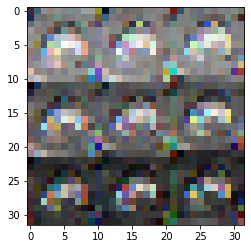

In [161]:
plot_image(data['train_images'][0])

In [162]:
train_images, test_images = normalize(data['train_images'], data['test_images'])

In [163]:
import tensorflow as tf
def get_model(dropout_rate = 0.10, optimizer='adam'):
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer=optimizer,
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])
    return model

In [164]:
def plot_train_val_loss(history):
    # Get the training loss and accuracy values from the history object
    training_loss = history.history['loss']
    training_acc = history.history['accuracy']

    # Get the validation loss and accuracy values from the history object
    val_loss = history.history['val_loss']
    val_acc = history.history['val_accuracy']

    # Plot the training and validation loss values
    plt.plot(training_loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')

    # Plot the training and validation accuracy values
    plt.plot(training_acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')

    # Add labels and legend to the plot
    plt.xlabel('Epoch')
    plt.ylabel('Loss/Accuracy')
    plt.legend()

    # Show the plot
    plt.show()

In [165]:
# Define function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred):
    classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
    cm = confusion_matrix(y_true, y_pred)
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues) #Create color code image using imshow function
    plt.title('Confusion matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt =  'd' #'.2f'
    thresh = cm.max() / 2  
    #Iterates over each cell in the confusion matrix
    for i, j in np.ndindex(cm.shape):
    #color of the text is set to white if the cell value is above half the maximum value in the matrix
        plt.text(j, i, format(cm[i, j], fmt),
                    horizontalalignment="center",
                    color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Epoch 1/100
391/391 [==============================] - 5s 11ms/step - loss: 2.1396 - accuracy: 0.2169 - val_loss: 1.8970 - val_accuracy: 0.3295
Epoch 2/100
391/391 [==============================] - 4s 11ms/step - loss: 1.8963 - accuracy: 0.3248 - val_loss: 1.8101 - val_accuracy: 0.3619
Epoch 3/100
391/391 [==============================] - 4s 11ms/step - loss: 1.8164 - accuracy: 0.3573 - val_loss: 1.7661 - val_accuracy: 0.3790
Epoch 4/100
391/391 [==============================] - 4s 11ms/step - loss: 1.7641 - accuracy: 0.3733 - val_loss: 1.7029 - val_accuracy: 0.4026
Epoch 5/100
391/391 [==============================] - 3s 9ms/step - loss: 1.7210 - accuracy: 0.3919 - val_loss: 1.6710 - val_accuracy: 0.4146
Epoch 6/100
391/391 [==============================] - 4s 10ms/step - loss: 1.6860 - accuracy: 0.4010 - val_loss: 1.6426 - val_accuracy: 0.4218
Epoch 7/100
391/391 [==============================] - 4s 10ms/step - loss: 1.6607 - accuracy: 0.4135 - val_loss: 1.6143 - val_accuracy: 

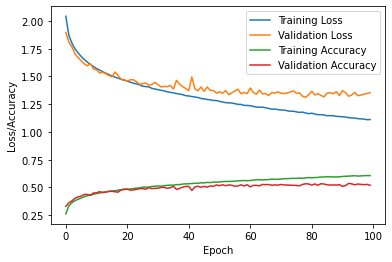

Epoch 1/100
391/391 [==============================] - 4s 10ms/step - loss: 1.9848 - accuracy: 0.2746 - val_loss: 1.7451 - val_accuracy: 0.3711
Epoch 2/100
391/391 [==============================] - 4s 10ms/step - loss: 1.7136 - accuracy: 0.3889 - val_loss: 1.5992 - val_accuracy: 0.4291
Epoch 3/100
391/391 [==============================] - 4s 10ms/step - loss: 1.6400 - accuracy: 0.4140 - val_loss: 1.5802 - val_accuracy: 0.4380
Epoch 4/100
391/391 [==============================] - 4s 9ms/step - loss: 1.5778 - accuracy: 0.4413 - val_loss: 1.5767 - val_accuracy: 0.4394
Epoch 5/100
391/391 [==============================] - 4s 10ms/step - loss: 1.5381 - accuracy: 0.4532 - val_loss: 1.5172 - val_accuracy: 0.4574
Epoch 6/100
391/391 [==============================] - 4s 9ms/step - loss: 1.5154 - accuracy: 0.4628 - val_loss: 1.5097 - val_accuracy: 0.4617
Epoch 7/100
391/391 [==============================] - 4s 9ms/step - loss: 1.4868 - accuracy: 0.4697 - val_loss: 1.4894 - val_accuracy: 0.

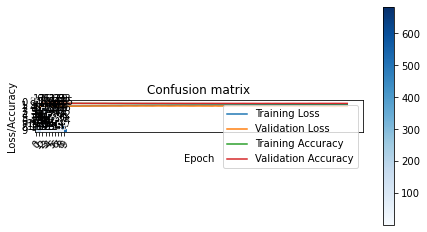

Epoch 1/100
391/391 [==============================] - 5s 11ms/step - loss: 2.0605 - accuracy: 0.2482 - val_loss: 1.7492 - val_accuracy: 0.3764
Epoch 2/100
391/391 [==============================] - 4s 9ms/step - loss: 1.7741 - accuracy: 0.3612 - val_loss: 1.7068 - val_accuracy: 0.3978
Epoch 3/100
391/391 [==============================] - 4s 9ms/step - loss: 1.7225 - accuracy: 0.3801 - val_loss: 1.7000 - val_accuracy: 0.3887
Epoch 4/100
391/391 [==============================] - 4s 10ms/step - loss: 1.6701 - accuracy: 0.3980 - val_loss: 1.6136 - val_accuracy: 0.4259
Epoch 5/100
391/391 [==============================] - 4s 10ms/step - loss: 1.6326 - accuracy: 0.4116 - val_loss: 1.5702 - val_accuracy: 0.4408
Epoch 6/100
391/391 [==============================] - 4s 10ms/step - loss: 1.6081 - accuracy: 0.4212 - val_loss: 1.5504 - val_accuracy: 0.4440
Epoch 7/100
391/391 [==============================] - 4s 9ms/step - loss: 1.5887 - accuracy: 0.4254 - val_loss: 1.5564 - val_accuracy: 0.

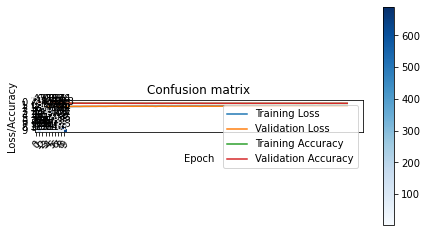

Epoch 1/100
391/391 [==============================] - 5s 10ms/step - loss: 2.1737 - accuracy: 0.1946 - val_loss: 1.9111 - val_accuracy: 0.3252
Epoch 2/100
391/391 [==============================] - 4s 10ms/step - loss: 1.9223 - accuracy: 0.3131 - val_loss: 1.8160 - val_accuracy: 0.3606
Epoch 3/100
391/391 [==============================] - 4s 11ms/step - loss: 1.8423 - accuracy: 0.3458 - val_loss: 1.7600 - val_accuracy: 0.3750
Epoch 4/100
391/391 [==============================] - 4s 11ms/step - loss: 1.7931 - accuracy: 0.3583 - val_loss: 1.7368 - val_accuracy: 0.3808
Epoch 5/100
391/391 [==============================] - 4s 10ms/step - loss: 1.7636 - accuracy: 0.3754 - val_loss: 1.6889 - val_accuracy: 0.4032
Epoch 6/100
391/391 [==============================] - 4s 9ms/step - loss: 1.7236 - accuracy: 0.3868 - val_loss: 1.6884 - val_accuracy: 0.3977
Epoch 7/100
391/391 [==============================] - 4s 10ms/step - loss: 1.7033 - accuracy: 0.3960 - val_loss: 1.6519 - val_accuracy: 

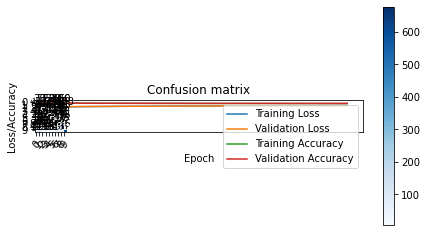

Epoch 1/100
391/391 [==============================] - 5s 11ms/step - loss: 2.0338 - accuracy: 0.2526 - val_loss: 1.7390 - val_accuracy: 0.3808
Epoch 2/100
391/391 [==============================] - 4s 10ms/step - loss: 1.7797 - accuracy: 0.3627 - val_loss: 1.6475 - val_accuracy: 0.4049
Epoch 3/100
391/391 [==============================] - 4s 9ms/step - loss: 1.7076 - accuracy: 0.3870 - val_loss: 1.5966 - val_accuracy: 0.4364
Epoch 4/100
391/391 [==============================] - 4s 9ms/step - loss: 1.6517 - accuracy: 0.4115 - val_loss: 1.5427 - val_accuracy: 0.4462
Epoch 5/100
391/391 [==============================] - 4s 9ms/step - loss: 1.6158 - accuracy: 0.4200 - val_loss: 1.5513 - val_accuracy: 0.4443
Epoch 6/100
391/391 [==============================] - 4s 10ms/step - loss: 1.5861 - accuracy: 0.4323 - val_loss: 1.5017 - val_accuracy: 0.4602
Epoch 7/100
391/391 [==============================] - 4s 9ms/step - loss: 1.5562 - accuracy: 0.4447 - val_loss: 1.4805 - val_accuracy: 0.4

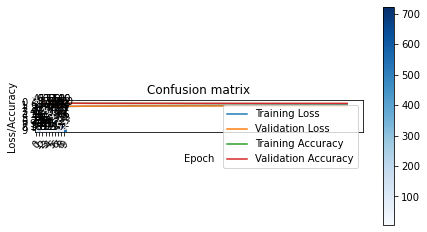

Epoch 1/100
391/391 [==============================] - 4s 10ms/step - loss: 2.2997 - accuracy: 0.1940 - val_loss: 1.8634 - val_accuracy: 0.3213
Epoch 2/100
391/391 [==============================] - 4s 10ms/step - loss: 1.9239 - accuracy: 0.2841 - val_loss: 1.8373 - val_accuracy: 0.3451
Epoch 3/100
391/391 [==============================] - 4s 10ms/step - loss: 1.8858 - accuracy: 0.3021 - val_loss: 1.7925 - val_accuracy: 0.3586
Epoch 4/100
391/391 [==============================] - 4s 10ms/step - loss: 1.8627 - accuracy: 0.3142 - val_loss: 1.7753 - val_accuracy: 0.3639
Epoch 5/100
391/391 [==============================] - 3s 9ms/step - loss: 1.8419 - accuracy: 0.3244 - val_loss: 1.8031 - val_accuracy: 0.3609
Epoch 6/100
391/391 [==============================] - 4s 10ms/step - loss: 1.8425 - accuracy: 0.3248 - val_loss: 1.7544 - val_accuracy: 0.3730
Epoch 7/100
391/391 [==============================] - 4s 10ms/step - loss: 1.8264 - accuracy: 0.3307 - val_loss: 1.7667 - val_accuracy: 

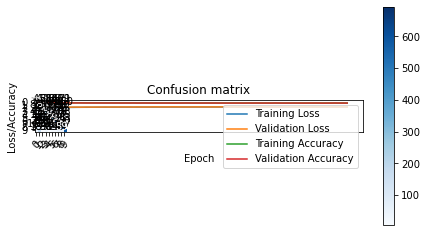

Epoch 1/100
391/391 [==============================] - 4s 10ms/step - loss: 2.2025 - accuracy: 0.1879 - val_loss: 1.9434 - val_accuracy: 0.3214
Epoch 2/100
391/391 [==============================] - 4s 9ms/step - loss: 1.9691 - accuracy: 0.2934 - val_loss: 1.8653 - val_accuracy: 0.3367
Epoch 3/100
391/391 [==============================] - 3s 8ms/step - loss: 1.8898 - accuracy: 0.3237 - val_loss: 1.8144 - val_accuracy: 0.3614
Epoch 4/100
391/391 [==============================] - 4s 9ms/step - loss: 1.8444 - accuracy: 0.3390 - val_loss: 1.7667 - val_accuracy: 0.3751
Epoch 5/100
391/391 [==============================] - 3s 9ms/step - loss: 1.8027 - accuracy: 0.3607 - val_loss: 1.7397 - val_accuracy: 0.3924
Epoch 6/100
391/391 [==============================] - 4s 9ms/step - loss: 1.7783 - accuracy: 0.3729 - val_loss: 1.7048 - val_accuracy: 0.3998
Epoch 7/100
391/391 [==============================] - 4s 10ms/step - loss: 1.7502 - accuracy: 0.3809 - val_loss: 1.6789 - val_accuracy: 0.40

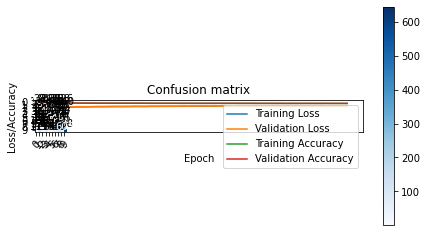

Epoch 1/100
391/391 [==============================] - 4s 10ms/step - loss: 2.0631 - accuracy: 0.2395 - val_loss: 1.7663 - val_accuracy: 0.3649
Epoch 2/100
391/391 [==============================] - 4s 10ms/step - loss: 1.8125 - accuracy: 0.3484 - val_loss: 1.6858 - val_accuracy: 0.3997
Epoch 3/100
391/391 [==============================] - 4s 11ms/step - loss: 1.7420 - accuracy: 0.3706 - val_loss: 1.6285 - val_accuracy: 0.4211
Epoch 4/100
391/391 [==============================] - 4s 9ms/step - loss: 1.7040 - accuracy: 0.3881 - val_loss: 1.5875 - val_accuracy: 0.4331
Epoch 5/100
391/391 [==============================] - 4s 10ms/step - loss: 1.6714 - accuracy: 0.3995 - val_loss: 1.5840 - val_accuracy: 0.4409
Epoch 6/100
391/391 [==============================] - 4s 10ms/step - loss: 1.6383 - accuracy: 0.4132 - val_loss: 1.5451 - val_accuracy: 0.4560
Epoch 7/100
391/391 [==============================] - 4s 10ms/step - loss: 1.6142 - accuracy: 0.4181 - val_loss: 1.5189 - val_accuracy: 

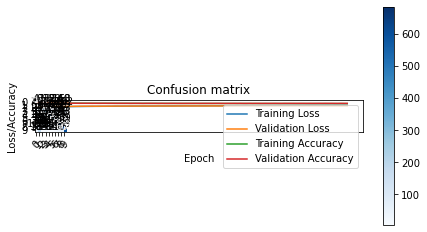

Epoch 1/100
391/391 [==============================] - 5s 12ms/step - loss: 2.3913 - accuracy: 0.1257 - val_loss: 2.1006 - val_accuracy: 0.1893
Epoch 2/100
391/391 [==============================] - 4s 10ms/step - loss: 2.1727 - accuracy: 0.1561 - val_loss: 2.0998 - val_accuracy: 0.1878
Epoch 3/100
391/391 [==============================] - 4s 9ms/step - loss: 2.1675 - accuracy: 0.1588 - val_loss: 2.1176 - val_accuracy: 0.1834
Epoch 4/100
391/391 [==============================] - 4s 10ms/step - loss: 2.1552 - accuracy: 0.1644 - val_loss: 2.0674 - val_accuracy: 0.1799
Epoch 5/100
391/391 [==============================] - 4s 10ms/step - loss: 2.1232 - accuracy: 0.1667 - val_loss: 2.0578 - val_accuracy: 0.1988
Epoch 6/100
391/391 [==============================] - 4s 10ms/step - loss: 2.1192 - accuracy: 0.1721 - val_loss: 2.0318 - val_accuracy: 0.2135
Epoch 7/100
391/391 [==============================] - 3s 9ms/step - loss: 2.1178 - accuracy: 0.1740 - val_loss: 2.0509 - val_accuracy: 0

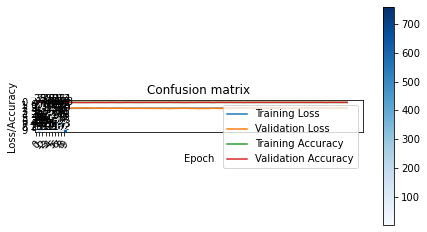

Epoch 1/100
391/391 [==============================] - 5s 11ms/step - loss: 2.2189 - accuracy: 0.1727 - val_loss: 1.9563 - val_accuracy: 0.2943
Epoch 2/100
391/391 [==============================] - 4s 10ms/step - loss: 1.9792 - accuracy: 0.2776 - val_loss: 1.8564 - val_accuracy: 0.3403
Epoch 3/100
391/391 [==============================] - 4s 10ms/step - loss: 1.9039 - accuracy: 0.3160 - val_loss: 1.8090 - val_accuracy: 0.3598
Epoch 4/100
391/391 [==============================] - 4s 9ms/step - loss: 1.8515 - accuracy: 0.3398 - val_loss: 1.7706 - val_accuracy: 0.3714
Epoch 5/100
391/391 [==============================] - 3s 9ms/step - loss: 1.8147 - accuracy: 0.3531 - val_loss: 1.7472 - val_accuracy: 0.3842
Epoch 6/100
391/391 [==============================] - 4s 10ms/step - loss: 1.7996 - accuracy: 0.3592 - val_loss: 1.7083 - val_accuracy: 0.3909
Epoch 7/100
391/391 [==============================] - 4s 9ms/step - loss: 1.7676 - accuracy: 0.3740 - val_loss: 1.6851 - val_accuracy: 0.

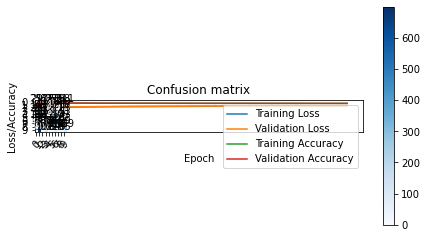

Epoch 1/100
391/391 [==============================] - 5s 12ms/step - loss: 2.0871 - accuracy: 0.2312 - val_loss: 1.8128 - val_accuracy: 0.3562
Epoch 2/100
391/391 [==============================] - 4s 11ms/step - loss: 1.8607 - accuracy: 0.3262 - val_loss: 1.7141 - val_accuracy: 0.4005
Epoch 3/100
391/391 [==============================] - 4s 10ms/step - loss: 1.8051 - accuracy: 0.3520 - val_loss: 1.6874 - val_accuracy: 0.4012
Epoch 4/100
391/391 [==============================] - 4s 11ms/step - loss: 1.7611 - accuracy: 0.3641 - val_loss: 1.6748 - val_accuracy: 0.4034
Epoch 5/100
391/391 [==============================] - 4s 9ms/step - loss: 1.7292 - accuracy: 0.3780 - val_loss: 1.6198 - val_accuracy: 0.4219
Epoch 6/100
391/391 [==============================] - 4s 9ms/step - loss: 1.7022 - accuracy: 0.3853 - val_loss: 1.6113 - val_accuracy: 0.4302
Epoch 7/100
391/391 [==============================] - 4s 10ms/step - loss: 1.6874 - accuracy: 0.3870 - val_loss: 1.5832 - val_accuracy: 0

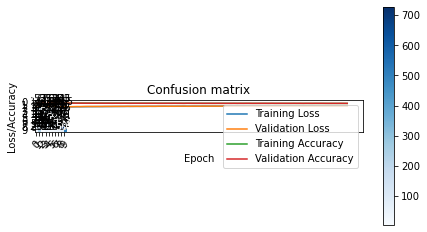

Epoch 1/100
391/391 [==============================] - 5s 11ms/step - loss: 2.3597 - accuracy: 0.1347 - val_loss: 2.1363 - val_accuracy: 0.1715
Epoch 2/100
391/391 [==============================] - 4s 10ms/step - loss: 2.2013 - accuracy: 0.1508 - val_loss: 2.1240 - val_accuracy: 0.1937
Epoch 3/100
391/391 [==============================] - 4s 9ms/step - loss: 2.1980 - accuracy: 0.1522 - val_loss: 2.1411 - val_accuracy: 0.1790
Epoch 4/100
391/391 [==============================] - 4s 9ms/step - loss: 2.1938 - accuracy: 0.1495 - val_loss: 2.1568 - val_accuracy: 0.1690
Epoch 5/100
391/391 [==============================] - 4s 10ms/step - loss: 2.1866 - accuracy: 0.1555 - val_loss: 2.1130 - val_accuracy: 0.1915
Epoch 6/100
391/391 [==============================] - 4s 10ms/step - loss: 2.1930 - accuracy: 0.1561 - val_loss: 2.0983 - val_accuracy: 0.1974
Epoch 7/100
391/391 [==============================] - 4s 10ms/step - loss: 2.1900 - accuracy: 0.1548 - val_loss: 2.1206 - val_accuracy: 0

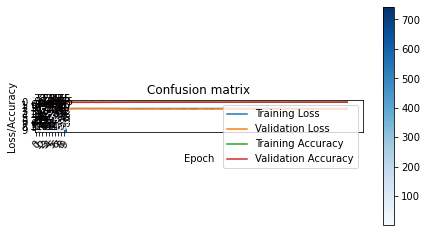

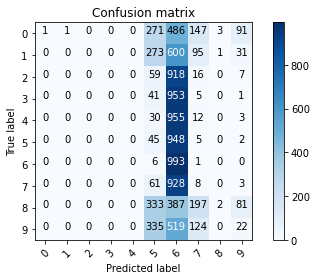

In [166]:
sgd = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.0, nesterov=False)
momentum = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
adam = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
drop_out_rates = [0.1, 0.2,0.3, 0.4]
optimizers = [sgd, momentum, adam]
for dropout in drop_out_rates:
    for optimzer in optimizers:
        model = get_model(dropout, optimzer) #adam | SGD | momentum 
        history  = model.fit(train_images, data['train_labels'], batch_size=128, epochs=100, validation_data=(test_images, data['test_labels']))
        print(f"Evaluating statistics for optimizer : {type(optimzer).__name__} with Dropout: {dropout} ")
        #Evaluate accuracy
        test_loss, test_acc = model.evaluate(test_images,  data['test_labels'], verbose=2)
        print('\nTest accuracy:', test_acc)
        plot_train_val_loss(history)
        predictions = model.predict(test_images) 
        test_predictions = np.argmax(predictions, axis=1)
        plot_confusion_matrix(data['test_labels'], test_predictions)

In [167]:
adam = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
print(type(adam).__name__)

Adam
